In [16]:
import pandas as pd
import os
import nltk
from nltk import ngrams
import redditcleaner
import numpy as np
from datetime import datetime

In [2]:
birth_stories_df = pd.DataFrame()
for file in os.listdir("data/subreddits/BabyBumps/submissions/"):
    post = "data/subreddits/BabyBumps/submissions/"+file
    if os.path.getsize(post) > 55:
        content = pd.read_json(post)
        birth_stories_df = birth_stories_df.append(content)

In [4]:
def birthstories(series):
    lowered = series.lower()
    if 'birth story' in lowered:
        return True
    if 'birth stories' in lowered:
        return True
    else:
        return False

birth_stories_df['birth story'] = birth_stories_df['title'].apply(birthstories)
birth_stories_df = birth_stories_df[birth_stories_df['birth story'] == True]
birth_stories_df

,archived,author,author_flair_text,author_flair_type,author_fullname,category,comment_limit,content_categories,created_utc,crosspost_parent,...,score,selftext,subreddit,subreddit_id,thumbnail,title,url,ups,upvote_ratio,birth story
31,NaN,LoveShinyThings,NaN,NaN,t2_dbjmw,NaN,NaN,NaN,1407478091,NaN,...,NaN,Hallo! I lurk a lot and absolutely love readin...,BabyBumps,t5_2s7cl,NaN,Australian FTM looking for non-medicated birth...,NaN,NaN,NaN,True
40,NaN,bumblebeerose,NaN,NaN,t2_6oz0x,NaN,NaN,NaN,1407498840,NaN,...,NaN,"Tl;dr Baby pictures!\n\n[Chillin' out, maxin' ...",BabyBumps,t5_2s7cl,NaN,Willow's Birth Story [Quite long!],NaN,NaN,NaN,True
117,NaN,undermoonandstar,NaN,NaN,t2_dwgo3,NaN,NaN,NaN,1407548377,NaN,...,NaN,"This is novel worthy so TL/DR: 41 weeks, thoug...",BabyBumps,t5_2s7cl,NaN,Catherine's Birth Story! 8/5/14,NaN,NaN,NaN,True
121,NaN,HoppyLady,NaN,NaN,t2_e3ze0,NaN,NaN,NaN,1407551228,NaN,...,NaN,Baby Alton has arrived! \n\nHe was born Aug 6 ...,BabyBumps,t5_2s7cl,NaN,"Birth Story, overdue, vaginal, no meds, fast, ...",NaN,NaN,NaN,True
187,NaN,[deleted],NaN,NaN,None,NaN,NaN,NaN,1407616060,NaN,...,NaN,I cannot believe I am one day shy of 3 weeks p...,BabyBumps,t5_2s7cl,NaN,Today was supposed to be my dues date. So I de...,NaN,NaN,NaN,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
567,NaN,Rubickk,NaN,NaN,t2_6jyet,NaN,NaN,NaN,1403047775,NaN,...,NaN,We found out we were pregnant with twins back ...,BabyBumps,t5_2s7cl,NaN,Birth story - Oliver Clark – Lost twin sibling...,NaN,NaN,NaN,True
668,NaN,whitepony7,NaN,NaN,t2_cjmrh,NaN,NaN,NaN,1403117296,NaN,...,NaN,I finally have time to write a birth story abo...,BabyBumps,t5_2s7cl,NaN,My twin birth story! Warning:LONG,NaN,NaN,NaN,True
676,NaN,auroraskies,NaN,NaN,None,NaN,NaN,NaN,1403119369,NaN,...,NaN,I didn't plan on writing one of these. I thoug...,BabyBumps,t5_2s7cl,NaN,"Everly's birth story. (Trigger warning, maybe.)",NaN,NaN,NaN,True
769,NaN,funnykings,NaN,NaN,t2_ayvuf,NaN,NaN,NaN,1403190211,NaN,...,NaN,I always appreciated reading birth stories so ...,BabyBumps,t5_2s7cl,NaN,"Birth Story - quick labor, 4th degree tear, we...",NaN,NaN,NaN,True


In [5]:
def story_lengths(series):
    lowered = series.lower()
    tokenized = nltk.word_tokenize(lowered)
    length = len(tokenized)
    return length

birth_stories_df['story length'] = birth_stories_df['selftext'].apply(story_lengths)

def long_stories(series):
    if series >= 500:
        return True
    else:
        return False

birth_stories_df['500+'] = birth_stories_df['story length'].apply(long_stories)
birth_stories_df = birth_stories_df[birth_stories_df['500+'] == True]
birth_stories_df

,archived,author,author_flair_text,author_flair_type,author_fullname,category,comment_limit,content_categories,created_utc,crosspost_parent,...,subreddit,subreddit_id,thumbnail,title,url,ups,upvote_ratio,birth story,story length,500+
40,NaN,bumblebeerose,NaN,NaN,t2_6oz0x,NaN,NaN,NaN,1407498840,NaN,...,BabyBumps,t5_2s7cl,NaN,Willow's Birth Story [Quite long!],NaN,NaN,NaN,True,1212,True
117,NaN,undermoonandstar,NaN,NaN,t2_dwgo3,NaN,NaN,NaN,1407548377,NaN,...,BabyBumps,t5_2s7cl,NaN,Catherine's Birth Story! 8/5/14,NaN,NaN,NaN,True,2295,True
187,NaN,[deleted],NaN,NaN,None,NaN,NaN,NaN,1407616060,NaN,...,BabyBumps,t5_2s7cl,NaN,Today was supposed to be my dues date. So I de...,NaN,NaN,NaN,True,1415,True
191,NaN,drpepperslut,NaN,NaN,t2_9t4ue,NaN,NaN,NaN,1407616985,NaN,...,BabyBumps,t5_2s7cl,NaN,"Today was supposed to be my due date, but I de...",NaN,NaN,NaN,True,1415,True
285,NaN,eelliott86,NaN,NaN,t2_dlgoq,NaN,NaN,NaN,1407698882,NaN,...,BabyBumps,t5_2s7cl,NaN,Penny's birth story!,NaN,NaN,NaN,True,2995,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
540,NaN,kayteedee,NaN,NaN,t2_3uw1w,NaN,NaN,NaN,1403035331,NaN,...,BabyBumps,t5_2s7cl,NaN,Reese's Birth Story: failed induction 6/10 (&a...,NaN,NaN,NaN,True,663,True
567,NaN,Rubickk,NaN,NaN,t2_6jyet,NaN,NaN,NaN,1403047775,NaN,...,BabyBumps,t5_2s7cl,NaN,Birth story - Oliver Clark – Lost twin sibling...,NaN,NaN,NaN,True,2219,True
668,NaN,whitepony7,NaN,NaN,t2_cjmrh,NaN,NaN,NaN,1403117296,NaN,...,BabyBumps,t5_2s7cl,NaN,My twin birth story! Warning:LONG,NaN,NaN,NaN,True,2939,True
676,NaN,auroraskies,NaN,NaN,None,NaN,NaN,NaN,1403119369,NaN,...,BabyBumps,t5_2s7cl,NaN,"Everly's birth story. (Trigger warning, maybe.)",NaN,NaN,NaN,True,1607,True


In [6]:
birth_stories_df = birth_stories_df[['author', 'title', 'selftext','story length','created_utc','permalink']]
birth_stories_df

,author,title,selftext,story length,created_utc,permalink
40,bumblebeerose,Willow's Birth Story [Quite long!],"Tl;dr Baby pictures!\n\n[Chillin' out, maxin' ...",1212,1407498840,/r/BabyBumps/comments/2cz0ww/willows_birth_sto...
117,undermoonandstar,Catherine's Birth Story! 8/5/14,"This is novel worthy so TL/DR: 41 weeks, thoug...",2295,1407548377,/r/BabyBumps/comments/2d1ahf/catherines_birth_...
187,[deleted],Today was supposed to be my dues date. So I de...,I cannot believe I am one day shy of 3 weeks p...,1415,1407616060,/r/BabyBumps/comments/2d3em6/today_was_suppose...
191,drpepperslut,"Today was supposed to be my due date, but I de...",I cannot believe I am one day shy of 3 weeks p...,1415,1407616985,/r/BabyBumps/comments/2d3g0j/today_was_suppose...
285,eelliott86,Penny's birth story!,So my birth story took me about 3 weeks to wri...,2995,1407698882,/r/BabyBumps/comments/2d62xl/pennys_birth_story/
...,...,...,...,...,...,...
540,kayteedee,Reese's Birth Story: failed induction 6/10 (&a...,"At my doctor appointment Friday 6/6, my blood ...",663,1403035331,/r/BabyBumps/comments/28ebsd/reeses_birth_stor...
567,Rubickk,Birth story - Oliver Clark – Lost twin sibling...,We found out we were pregnant with twins back ...,2219,1403047775,/r/BabyBumps/comments/28ewos/birth_story_olive...
668,whitepony7,My twin birth story! Warning:LONG,I finally have time to write a birth story abo...,2939,1403117296,/r/BabyBumps/comments/28hdyv/my_twin_birth_sto...
676,auroraskies,"Everly's birth story. (Trigger warning, maybe.)",I didn't plan on writing one of these. I thoug...,1607,1403119369,/r/BabyBumps/comments/28hho7/everlys_birth_sto...


**Table 1: Corpus Stats**

In [11]:
#number of stories with more than 500 words
num_stories = len(list(birth_stories_df['selftext']))
num_stories

1401

In [8]:
#average story length
all_story_lengths = list(birth_stories_df['story length'])
average_story_length = np.mean(all_story_lengths)
average_story_length

1386.524625267666

In [10]:
#longest story
max_story_length = max(all_story_lengths)
max_story_length

5178

In [15]:
#number of unique words in the stories
all_unique_words = []
def unique_words(series):
    lowered = series.lower()
    tokenized = nltk.word_tokenize(lowered)
    for word in tokenized:
        if word not in all_unique_words:
            all_unique_words.append(word)
        else:
            continue
            
birth_stories_df['selftext'].apply(unique_words)
len(all_unique_words)

28575

**Figure 1 (left): how many stories appeared in a year**

<ipython-input-27-08b872a352e0>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  birth_stories_df['year created'] = birth_stories_df['created_utc'].apply(get_post_year)


<AxesSubplot:>

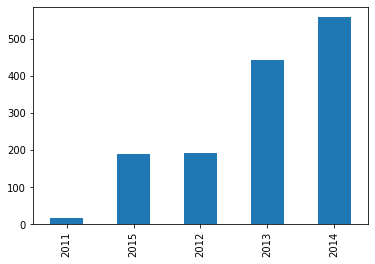

In [27]:
#translate created_utc column into years
def get_post_year(series):
    parsed_date = datetime.utcfromtimestamp(series)
    year = parsed_date.year
    return year

birth_stories_df['year created'] = birth_stories_df['created_utc'].apply(get_post_year)
posts_per_year = birth_stories_df['year created'].value_counts()
#posts_per_year.plot.bar(x='year', y='number of posts')
posts_per_year.sort_values().plot.bar()

**Figure 1 (right): Distribution of number of stories that had numbers of words**

<AxesSubplot:>

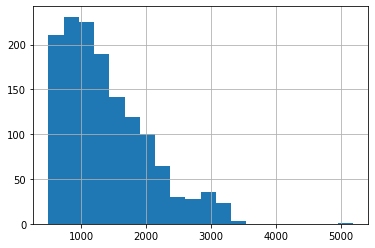

In [41]:
#histogram
birth_stories_df['story length'].hist(bins=20)

In [ ]:
#clean titles for bigram detection
def clean_titles(series):
    lowered = series.lower()
    tokenized = " ".join([" ".join(nltk.word_tokenize(title)) for title in nltk.sent_tokenize(str(lowered))]).split()
    return tokenized
birth_stories_df['cleaned title'] = birth_stories_df['title'].apply(clean_titles)
birth_stories_df